<a href="https://colab.research.google.com/github/Kamarul891212/STQD6014_Data_Science_P132829/blob/main/Olympic_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Explanatory Data Analysis of Olympic Games**

# **Introduction**

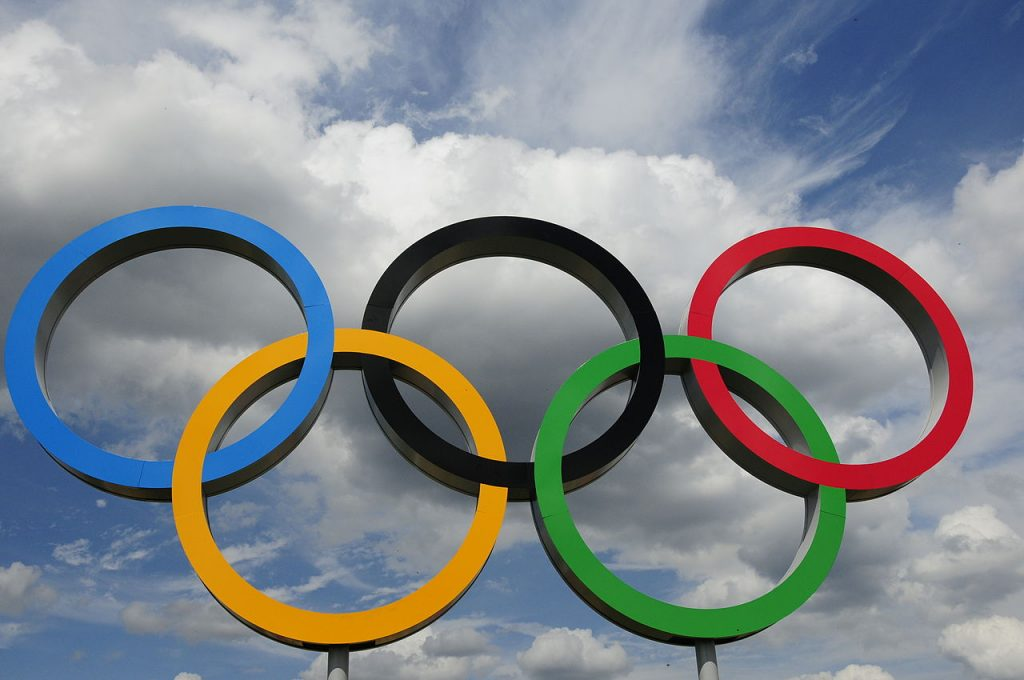

In [43]:
from IPython.display import Image
image_path = '/content/drive/MyDrive/MSc SDA/Sem 1_2023_2024/STQD6014/Project/Project_2/Olympic_ring.jpg'
Image(filename=image_path)

The Olympic Games are a prestigious international sporting event that takes place every four years, bringing together athletes from around the world to compete in various sports. The modern Olympic Games have their origins in ancient Greece, where athletic competitions were held in Olympia as early as 776 BCE.

The modern Olympic Games were revived in the late 19th century by Pierre de Coubertin, a French educator and sports enthusiast. The inaugural modern Olympics were held in Athens in 1896, featuring athletes from 14 nations. Since then, the Olympic Games have grown in size and significance, becoming one of the most-watched and celebrated events globally.

Key features of the Olympic Games include the Olympic torch relay, where the Olympic flame is carried from the site of the ancient Olympics in Olympia, Greece, to the host city, symbolizing the continuity between the ancient and modern Games. The opening ceremony marks the beginning of the Games, featuring artistic performances, the parade of nations, and the lighting of the Olympic cauldron.

The Summer and Winter Olympics are the two main editions of the Games, alternating every two years. The Summer Olympics feature a diverse range of sports such as athletics, swimming, gymnastics, and soccer, while the Winter Olympics focus on winter sports like skiing, ice hockey, and figure skating.

The International Olympic Committee (IOC) is the governing body responsible for organizing and overseeing the Olympic Games. The Games aim to promote international understanding, friendship, and cooperation through sport, and they have become a symbol of unity and peace across the globe. Athletes who participate in the Olympics represent their respective countries, competing at the highest level to achieve personal and national excellence.

## **About the dataset**

This dataset can be downloaded from kaggle with url http://tinyurl.com/3v29d4fx.

The feature description of the variables are as below:

| Feature      | Description                                    |
|--------------|------------------------------------------------|
| year         | The year of the Olympic Games                  |
| games_type   | Type of Games (summer/winter)                  |
| host_country | The name of the country that hosted the Games  |
| host_city    | The name of the city where the Games were held |
| athletes     | The number of athletes who participated in the Games |
| teams        | The number of teams who participated in the Games |
| competitions | The number of competitions held during the Games |
| country      | The name of the country that participated in the Games |
| gold         | The number of gold medals won by the country |
| silver       | The number of silver medals won by the country |
| bronze       | The number of bronze medals won by the country |


### **Data Exploratory**

The dataset can be downloded from the url and the heading of each variables as shown below.

In [44]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
# Download the olympic_games.csv file here: http://tinyurl.com/3v29d4fx
# Upload olympic_games.csv to Google Drive
from google.colab import files
files.upload()

In [46]:
df = pd.read_table('/content/olympic_games.csv', sep = ',')
print(df.head(5))

   year games_type host_country host_city  athletes  teams  competitions  \
0  2022     Winter        China   Beijing      2834     91           109   
1  2022     Winter        China   Beijing      2834     91           109   
2  2022     Winter        China   Beijing      2834     91           109   
3  2022     Winter        China   Beijing      2834     91           109   
4  2022     Winter        China   Beijing      2834     91           109   

     country  gold  silver  bronze  
0  Australia     1       2       1  
1    Austria     7       7       4  
2    Belarus     0       2       0  
3    Belgium     1       0       1  
4     Canada     4       8      14  


In [47]:
df.dtypes

year             int64
games_type      object
host_country    object
host_city       object
athletes         int64
teams            int64
competitions     int64
country         object
gold             int64
silver           int64
bronze           int64
dtype: object

The dataset have four (4) categorical variables and seven (7) numerical variables.

In [48]:
df.describe()

,year,athletes,teams,competitions,gold,silver,bronze
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000
mean,1980.679394,6135.094329,118.057833,185.499719,3.747333,3.723189,3.976418
std,31.902572,3899.002862,68.583661,100.780207,7.557803,6.388830,6.146937
min,1896.000000,241.000000,12.000000,14.000000,0.000000,0.000000,0.000000
25%,1960.000000,2566.000000,59.000000,102.000000,0.000000,0.000000,1.000000
50%,1988.000000,5338.000000,92.000000,172.000000,1.000000,2.000000,2.000000
75%,2008.000000,10568.000000,199.000000,300.000000,4.000000,4.000000,5.000000
max,2022.000000,11420.000000,207.000000,339.000000,83.000000,78.000000,77.000000


The numerical variables of the dataset is described as above.

### **Data Cleaning**

The data is cleaned by searching for the missing data (NA).

In [49]:
df.isna().sum()

year            0
games_type      0
host_country    0
host_city       0
athletes        0
teams           0
competitions    0
country         0
gold            0
silver          0
bronze          0
dtype: int64

There is **no missing data** in the dataset.

## **Purpose and context of the analysis**

The purpose of this analysis is to understand the distribution of medals among participating countries in the Olympic game throughout 1896 to 2022 for both Winter and Summer games.

This analysis will determine the top 10 countries with most medal won
 according to game type and also specifically for the gold medal won for each competition held during Olympic games.

# **Problem Statement**

The problem statements for this analysis is as follows:


*   To determine the **top 10 countries with highest gold medal won** for Winter and Summer games
*   To study the **distribution of medals won by Southeast Asia country including Malaysia** during participation in the Olympic games.



# **Results and Discussion**

Firstly, we will create the total medals by combining the gold, silver and bronze medal. This will determine the sum of medals won by each countries for every events of Olympic games held starting from 1896 to 2022.

In [50]:
# create total medals column

df['total medals'] = df['gold'] + df['silver'] + df['bronze']
df.head(10)

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze,total medals
0,2022,Winter,China,Beijing,2834,91,109,Australia,1,2,1,4
1,2022,Winter,China,Beijing,2834,91,109,Austria,7,7,4,18
2,2022,Winter,China,Beijing,2834,91,109,Belarus,0,2,0,2
3,2022,Winter,China,Beijing,2834,91,109,Belgium,1,0,1,2
4,2022,Winter,China,Beijing,2834,91,109,Canada,4,8,14,26
5,2022,Winter,China,Beijing,2834,91,109,Czechia,1,0,1,2
6,2022,Winter,China,Beijing,2834,91,109,Estonia,0,0,1,1
7,2022,Winter,China,Beijing,2834,91,109,Finland,2,2,4,8
8,2022,Winter,China,Beijing,2834,91,109,France,5,7,2,14
9,2022,Winter,China,Beijing,2834,91,109,Germany,12,10,5,27


The **top 10 countries** with the **highest medals won** in the Olympic games.

In [51]:
df_country = df.groupby('country')['total medals'].agg(['sum', 'count']).reset_index()
df_country_total_medals = df_country.sort_values('sum', ascending = False).head(10)
df_country_total_medals

,country,sum,count
143,United States of America,2968,52
136,USSR,1204,18
46,Germany,1079,36
141,United Kingdom,925,44
42,France,902,52
64,Italy,770,47
100,People's Republic of China,713,19
125,Sweden,679,50
4,Australia,580,38
66,Japan,575,36


The list of **top 10 countries** with highest medal won is lead by **United States of America**, followed by USSR and Germany. The other countries in the list are United Kingdom, France, Italy, People's Republic of China, Sweden, Australia and Japan.

The **United States of America** won a total of **2,968 medals** with 52 times participation in Olympic games. The second place is **USSR** with total of **1,204 medals** won with only 18 times participation in the Olympic games. This is related to the games type that comprise of Winter and Summer Olympic games.

Below is the **top 10 countries** with the **highest gold medals** won in the Olympic game.

In [52]:
df_country_gold = df.groupby('country')['gold'].agg(['sum', 'count']).reset_index()
df_country_top_gold = df_country_gold.sort_values('sum', ascending = False).head(10)
df_country_top_gold

,country,sum,count
143,United States of America,1178,52
136,USSR,473,18
46,Germany,349,36
100,People's Republic of China,285,19
141,United Kingdom,284,44
42,France,268,52
64,Italy,264,47
125,Sweden,211,50
96,Norway,209,48
110,Russian Federation,194,14


The **United States of America** leading the list of top 10 countries with the highest total of gold medals of **1,179** followed by **USSR** with **473** gold medals.

In [53]:
# A new data frame for highest total medals in Southeast Asia country with medals
filter_sea = ['Malaysia','Thailand','Indonesia', 'Philippines','Singapore', 'Vietnam']
df_filter_sea = df[df['country'].isin(filter_sea)]
df_country_sea = df_filter_sea.groupby('country')['total medals'].agg(['sum', 'count']).reset_index()
df_country_sea_total_medals = df_country_sea.sort_values('sum', ascending = False).head()
df_country_sea_total_medals

,country,sum,count
0,Indonesia,37,9
4,Thailand,35,11
2,Philippines,14,9
1,Malaysia,13,6
3,Singapore,5,4


For Southeast Asia countries, **Indonesia** is the in the top list with a total of **37** medals followed by **Thailand** with a total of **35** medals. **Malaysia** sit at the **4th** place with a total of **13** medals won throughout its participation in Olympic games.


In [54]:
# To filter Malaysia
df_filter_sea = df[df['country'].isin(filter_sea)]
df_filter_sea[df_filter_sea['country']=='Malaysia']

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze,total medals
82,2020,Summer,Japan,Tokyo,11420,206,339,Malaysia,0,1,1,2
200,2016,Summer,Brazil,Rio,11238,207,306,Malaysia,0,4,1,5
313,2012,Summer,Great Britain,London,10568,204,302,Malaysia,0,1,1,2
423,2008,Summer,China,Beijing,10942,204,302,Malaysia,0,1,0,1
732,1996,Summer,United States,Atlanta,10318,197,271,Malaysia,0,1,1,2
827,1992,Summer,Spain,Barcelona,9356,169,257,Malaysia,0,0,1,1


Malaysia has **6 times participation with medals won** in Olympic games from 1992 to 2020 with the highest total medals won at Rio with 5 medals.

## **Visualizations**

### **Boxplot of top 10 countries with highest medals**

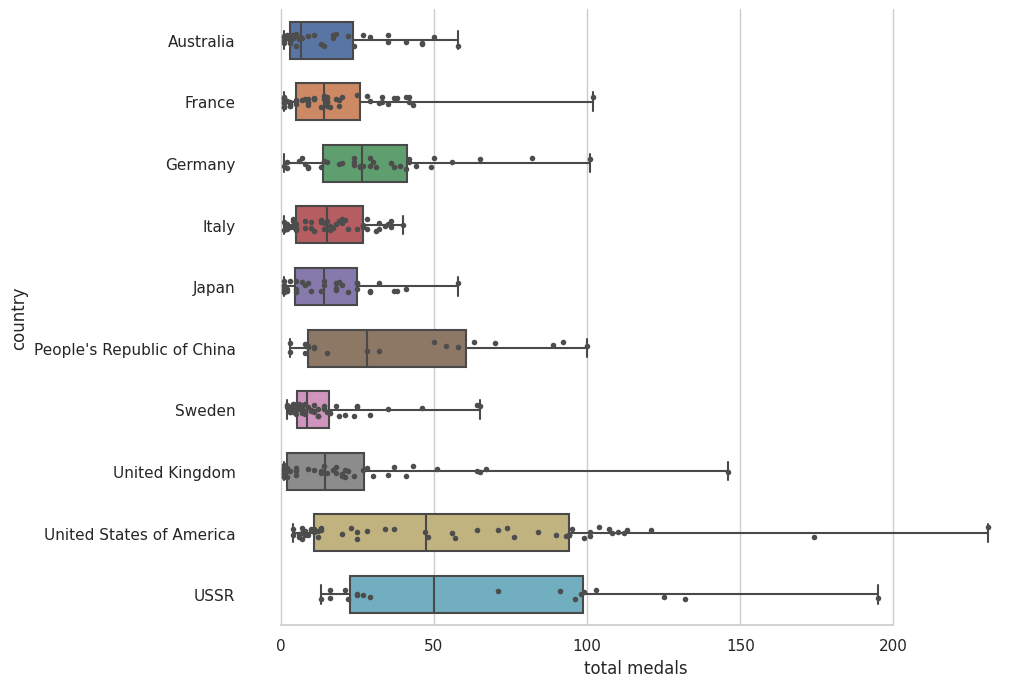

In [55]:
# New data frame for top country with medals
filter = ['United States of America','USSR','Germany', 'United Kingdom','France', 'Italy', "People's Republic of China", 'Sweden','Australia', 'Japan']
df_filter_top_country = df[df['country'].isin(filter)]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.boxplot(
    df_filter_top_country, x="total medals", y="country",
    whis=[0, 100], width=.6
)

# Add in points to show each observation
sns.stripplot(df_filter_top_country, x="total medals", y="country", size=4, color=".3")

# Tweak the visual presentation
#ax.xaxis.grid(True)
#ax.set(ylabel="")
sns.despine(trim=True, left=True)

The boxplot shows the distribution of total medals won by each of the top 10 countries. Most of the country have positively skewed distribution in which the right tail is longer and the box being closer to the left side of the plot. This indicates that the medals won by those countries is mostly in average of total medals won by the country and a few of higher total medals won which shows a tail of hihger values on the right side. We can see that most of the total medals won by each countries is concentrated below 100.

### **Boxplot of top 10 countries with highest gold medals**

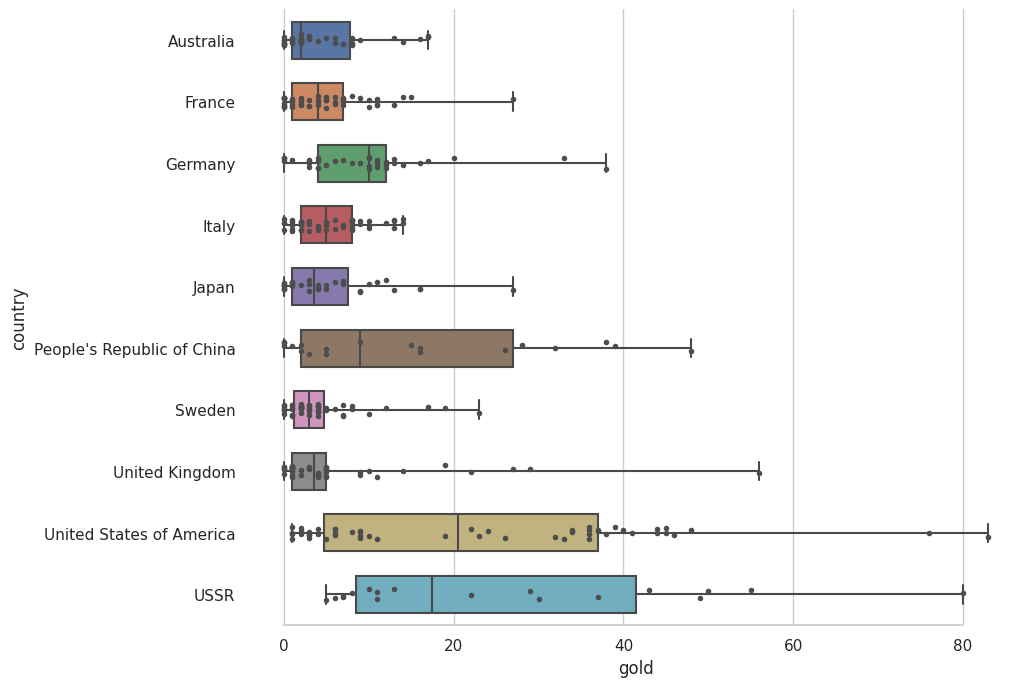

In [56]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.boxplot(
    df_filter_top_country, x="gold", y="country",
    whis=[0, 100], width=.6
)

# Add in points to show each observation
sns.stripplot(df_filter_top_country, x="gold", y="country", size=4, color=".3")

# Tweak the visual presentation

sns.despine(trim=True, left=True)

The boxplot shows the distribution of total gold medals won by each of the top 10 countries. Most of the country have positively skewed distribution in which the right tail is longer and the box being closer to the left side of the plot. This indicates that the gold medals won by those countries is mostly in average of total gold medals won by the country and a few of higher total gold medals won which shows a tail of hihger values on the right side. Though for United States of America, the median is more shifted to the right and the right tail is shorter compared from the previous total medals boxplot.

### **Boxplot comparison of Winter and Summer Olympic Games**

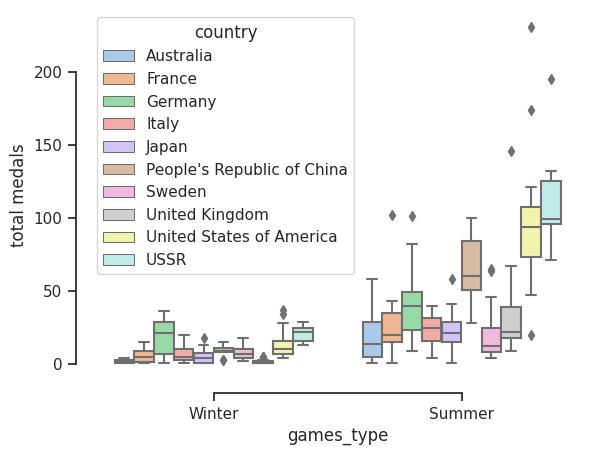

In [57]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="games_type", y="total medals",
            hue="country",
            data=df_filter_top_country)
sns.despine(offset=10, trim=True)

The boxplot shows that when the Olympic games is divided by game type of Winter and Summer, the top 10 countries with highest medals is changed. As for Summer games, although United States of America have the total medals, the most constantly winning through the Summer game with average medals won is USSR based on the concentrated box values that is higher than the other countries.

For the Winter games, it shows that the Germany and USSR have a higher concentrated box values with median of their total medals won is higher than United States of America.

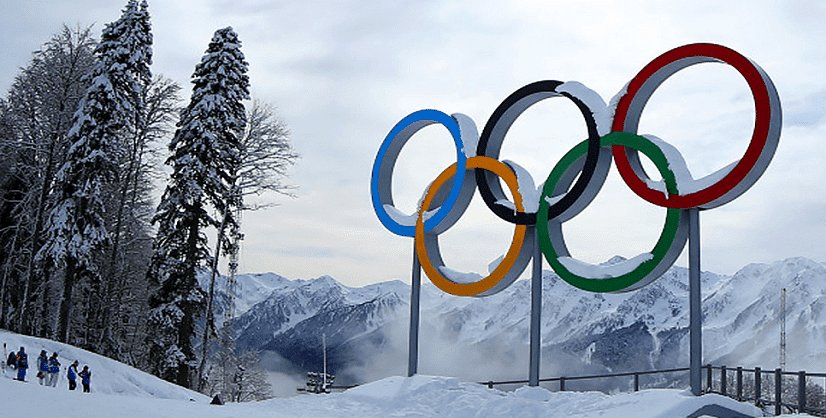

In [58]:
image_path = '/content/drive/MyDrive/MSc SDA/Sem 1_2023_2024/STQD6014/Project/Project_2/winter_olympics.jpg'
Image(filename=image_path)

### **Boxplot comparison of gold medals of Winter and Summer Olympic Games**

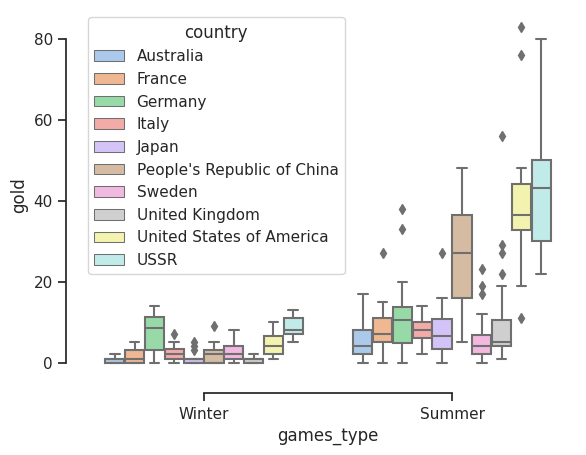

In [59]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="games_type", y="gold",
            hue="country",
            data=df_filter_top_country)
sns.despine(offset=10, trim=True)

For the distribution of boxplot in Summer games, it shows that USSR have a higher box concentration and a longer right tail although United States of America have the highest value of total gold medals. It also shows that the top 3 countries with the highest distribution of gold medals in the Summer games are USSR, United States of America and followed by People's Republic of China.

As for the Winter games, it shows that both USSR and Germany topping the list as the boxplot concentrated higher and also the median to the right followed by United States of America.

### **Line plot of total medals of Southeast Asia**

<Axes: xlabel='year', ylabel='total medals'>

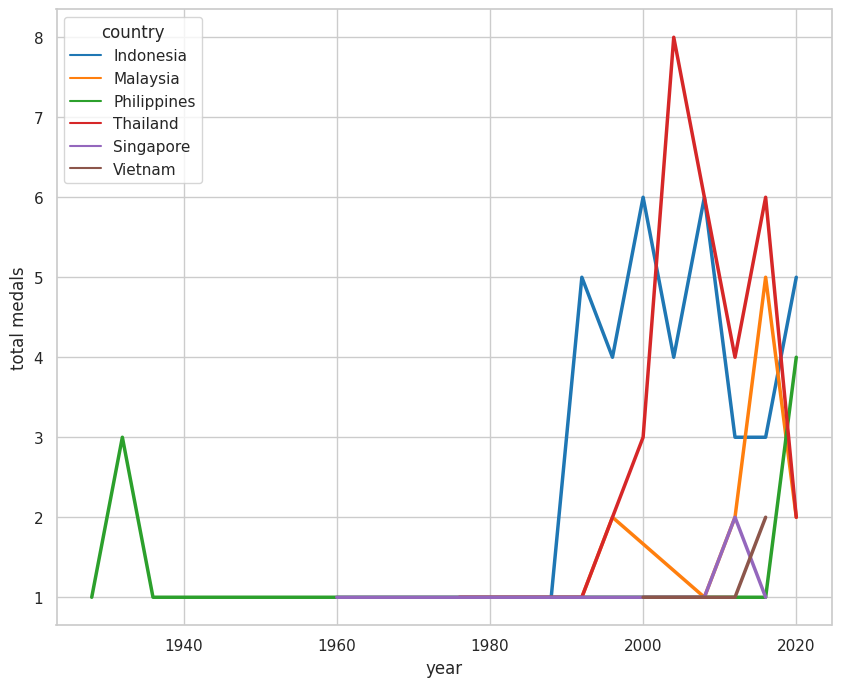

In [60]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

# Plot the responses for different events and regions
sns.lineplot(data=df_filter_sea, x="year", y="total medals",
             hue="country",
             palette="tab10", linewidth=2.5, errorbar=None)

The plot shows that the first Southeast Asia country to ever win a medal in the Olympic games is Philippine that is in the year of 1928 followed by Singapore in 1960. Most of the other Southeast Asia country started winning a medals in the 90s with Malaysia in the year 1992. The highest medals won by Southeast Asia is Thailand in 2004 with a total of 8 medals.

### **Line plot of total medals of Malaysia**

<Axes: xlabel='year', ylabel='total medals'>

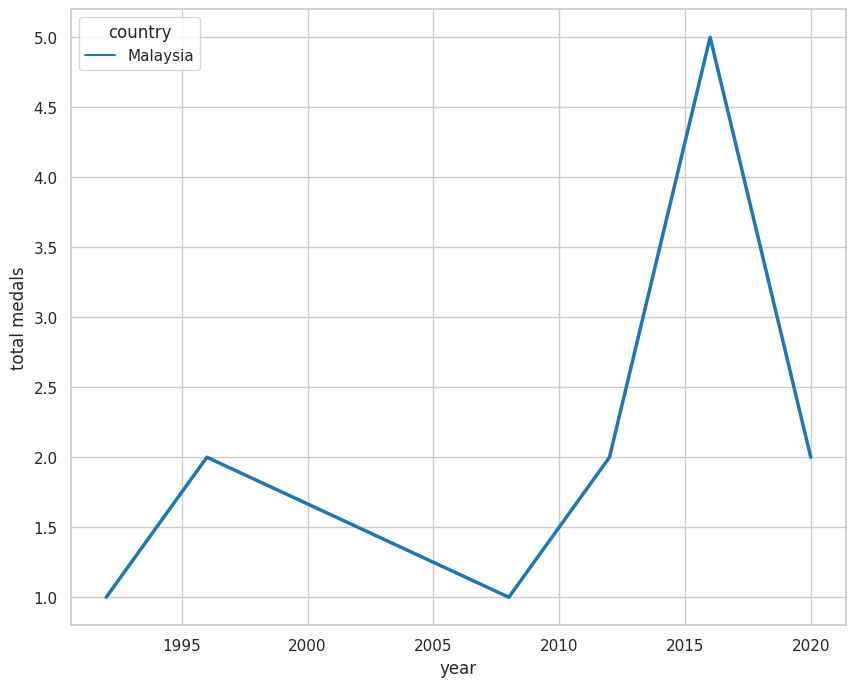

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

# Plot the responses for different events and regions
sns.lineplot(data=df_filter_sea[df_filter_sea['country']=='Malaysia'], x="year", y="total medals",
             hue="country",
             palette="tab10", linewidth=2.5, errorbar=None)

As for Malaysia, the highest total medals won by our country is in the 2016 Rio Olympic games with a total of 5 medals. 4 silver medals contributed from Badminton which contributed 3 silver diving 1 medal. The other medal which is 1 bronze medal contributed from cycling.

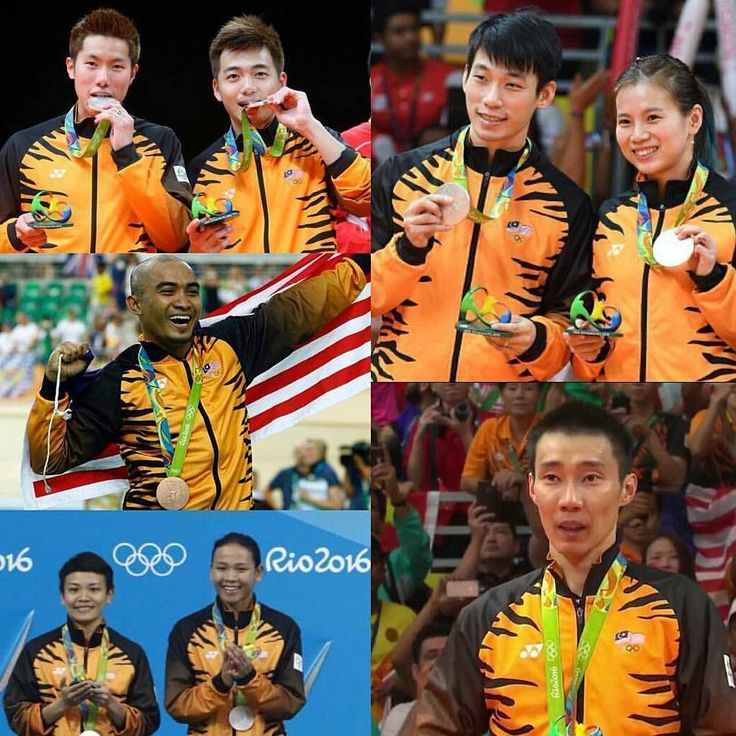

In [62]:
image_path = '/content/drive/MyDrive/MSc SDA/Sem 1_2023_2024/STQD6014/Project/Project_2/Winners.jpg'
Image(filename=image_path)

# **Conclusion**

The conclusion of this explanatory data analysis of Olympic games based on the problem statement mention in the early section, we can conclude that:

* United States of America is the country with the most medals won throughout the Olympic games from 1896 to 2022 with total medals of 2,968 with 52 times participation. Although, if we look by games type of Summer Olympic games, USSR comes close in total medals won and for Winter Olympic games, Germany and USSR is leading the United States of America by total medals won concentration.

* For Southeast Asia countries participation in Olympic games, it shows that the total medals won is increasing throughout the year of participation with Thailand leading by total of 8 medals. As for Malaysia, we can aim for more medals in next 2024 Olympic games focusing on games like Badminton, Diving and Cycling as it is the most contributing games for Malaysia.